## Linear Regression

###     1. Training data

In [1]:
from IPython.display import display,Math,Latex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
w1 = 3
w0 =4
n =100


X = 10*np.random.rand(n,)

y = w0 + w1*X + np.random.randn(n,)

In [6]:
X.shape,y.shape

((100,), (100,))

### 2. Train-test split

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80,), (80,), (20,), (20,))

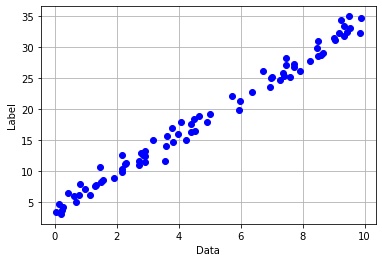

In [9]:
plt.plot(X_train,y_train,'bo')
plt.grid(True)
plt.xlabel("Data")
plt.ylabel("Label")
plt.show()


### 3. Adding dummy features

In [2]:
def add_dummy_features(X:np.ndarray):
    return np.column_stack((np.ones(X.shape[0]),X))

In [3]:
X = add_dummy_features(np.array([[3,2,5],[9,4,7]]))

In [4]:
X

array([[1., 3., 2., 5.],
       [1., 9., 4., 7.]])

In [50]:
def predict(X,w):
    assert X.shape[-1] == w.shape[0],f"{X.shape} and {w.shape} are not compatible"
    return X @ w

In [72]:
w = np.array([1,1,1,1])

In [52]:
predict(X,w)

array([11., 21.])

In [53]:
def loss(X,w,y):
    e = predict(X,w) - y
    return (1/2)*np.transpose(e)@e

In [54]:
y = np.array([6,11])

In [55]:
loss(X,w,y)

62.5

$${Derivative = X^{T}(Xw - Y)}$$

In [74]:
def calculate_gradient(X,y,w):
    djdw = np.transpose(X)@(predict(X,w) - y)
    return djdw

In [75]:
djdw = calculate_gradient(X,y,w)

In [76]:
def weight_update(lr,grad,w):
    return (w-lr*grad)

In [77]:
weight_update(1,djdw,w)

array([ -14., -104.,  -49.,  -94.])

In [82]:
def gradient_descent(X,y,w,num_epochs,):
    w_all = []
    err_all = []
    
    for i in range(0,num_epochs):
        w_all.append(w)
        err_all.append(loss(X,w,y))
        djdw = calculate_gradient(X,y,w)
        print(i,err_all[-1])
        weight_update(djdw,w)
        
    

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_656/2014409710.py, line 10)

In [81]:
gradient_descent(X,y,w,10)

0 62.5


NameError: name 'lr' is not defined

In [176]:
class LinearRegression():
    def __init__(self):
        self.t0 = 20
        self.t1 = 100
        
    def predict(self,X:np.ndarray):
        return X @ self.w
    
    def loss(self,X:np.ndarray,y:np.ndarray) -> float:
        e = self.predict(X)
        return (1/2)*(np.transpose(e)@e)
    def rmse(self,X:np.ndarray,y:np.ndarray) -> float:
        return np.sqrt((2/X.shape[0])*self.loss(X,y))
    
    def calculate_gradient(self,X:np.ndarray,y:np.ndarray) -> np.ndarray:
        return np.transpose(X)@(self.predict(X) - y)
    
    def weight_update(self,lr:float,grad:np.ndarray) -> np.ndarray:
        return self.w - (lr*grad)
    
    def gradient_descent(self,X:np.ndarray,y:np.ndarray,lr:float,num_epoch:int) -> np.ndarray:
        self.w = np.zeros(X.shape[-1])
        w_all = []
        err_all = []
        
        for epoch in range(num_epoch):
            w_all.append(self.w)
            err_all.append(self.loss(X,y))
            dJdw = self.calculate_gradient(X,y)
            self.w = self.weight_update(lr,dJdw)

        return self.w,w_all,err_all
    
    

In [177]:
linreg = LinearRegression()

In [178]:
X = np.array([[1,1,3,5],[1,1,4,7]])


In [179]:
y = np.array([9,11])

In [180]:
linreg.w = np.array([1,1,1,1])

In [181]:
linreg.predict(X)

array([10, 13])

In [182]:
linreg.loss(X,y)

134.5

In [183]:
linreg.rmse(X,y)

11.597413504743201

In [184]:
grad = linreg.calculate_gradient(X,y)

In [185]:
linreg.weight_update(0.01,grad)

array([0.97, 0.97, 0.89, 0.81])

In [186]:
w,w_all,err = linreg.gradient_descent(X,y,0.01,10)

In [187]:
w_all

[array([0., 0., 0., 0.]),
 array([0.2 , 0.2 , 0.71, 1.22]),
 array([0.1959, 0.1959, 0.6899, 1.1839]),
 array([0.197703, 0.197703, 0.690922, 1.184141]),
 array([0.19933342, 0.19933342, 0.69133245, 1.18333148]),
 array([0.20096703, 0.20096703, 0.69176012, 1.18255321]),
 array([0.20259876, 0.20259876, 0.69218683, 1.18177489]),
 array([0.20422874, 0.20422874, 0.69261309, 1.18099743]),
 array([0.20585699, 0.20585699, 0.6930389 , 1.18022081]),
 array([0.20748349, 0.20748349, 0.69346425, 1.17944501])]

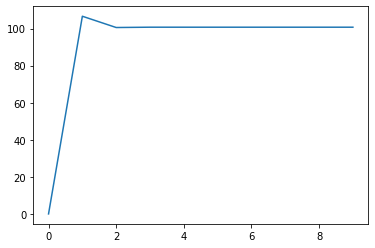

In [188]:
plt.plot(np.arange(0,10),err)